In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

###  Exploratory Data Analysis (EDA):

In [7]:
df=pd.read_csv("wine.csv")

In [9]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [56]:
def box(df,columns):
    plt.figure(figsize=(20,10))
    sns.boxplot(data=df,color='black')
    plt.xticks(rotation=90)
    plt.suptitle("boxplot",fontsize=25,fontweight='bold')
    plt.show()

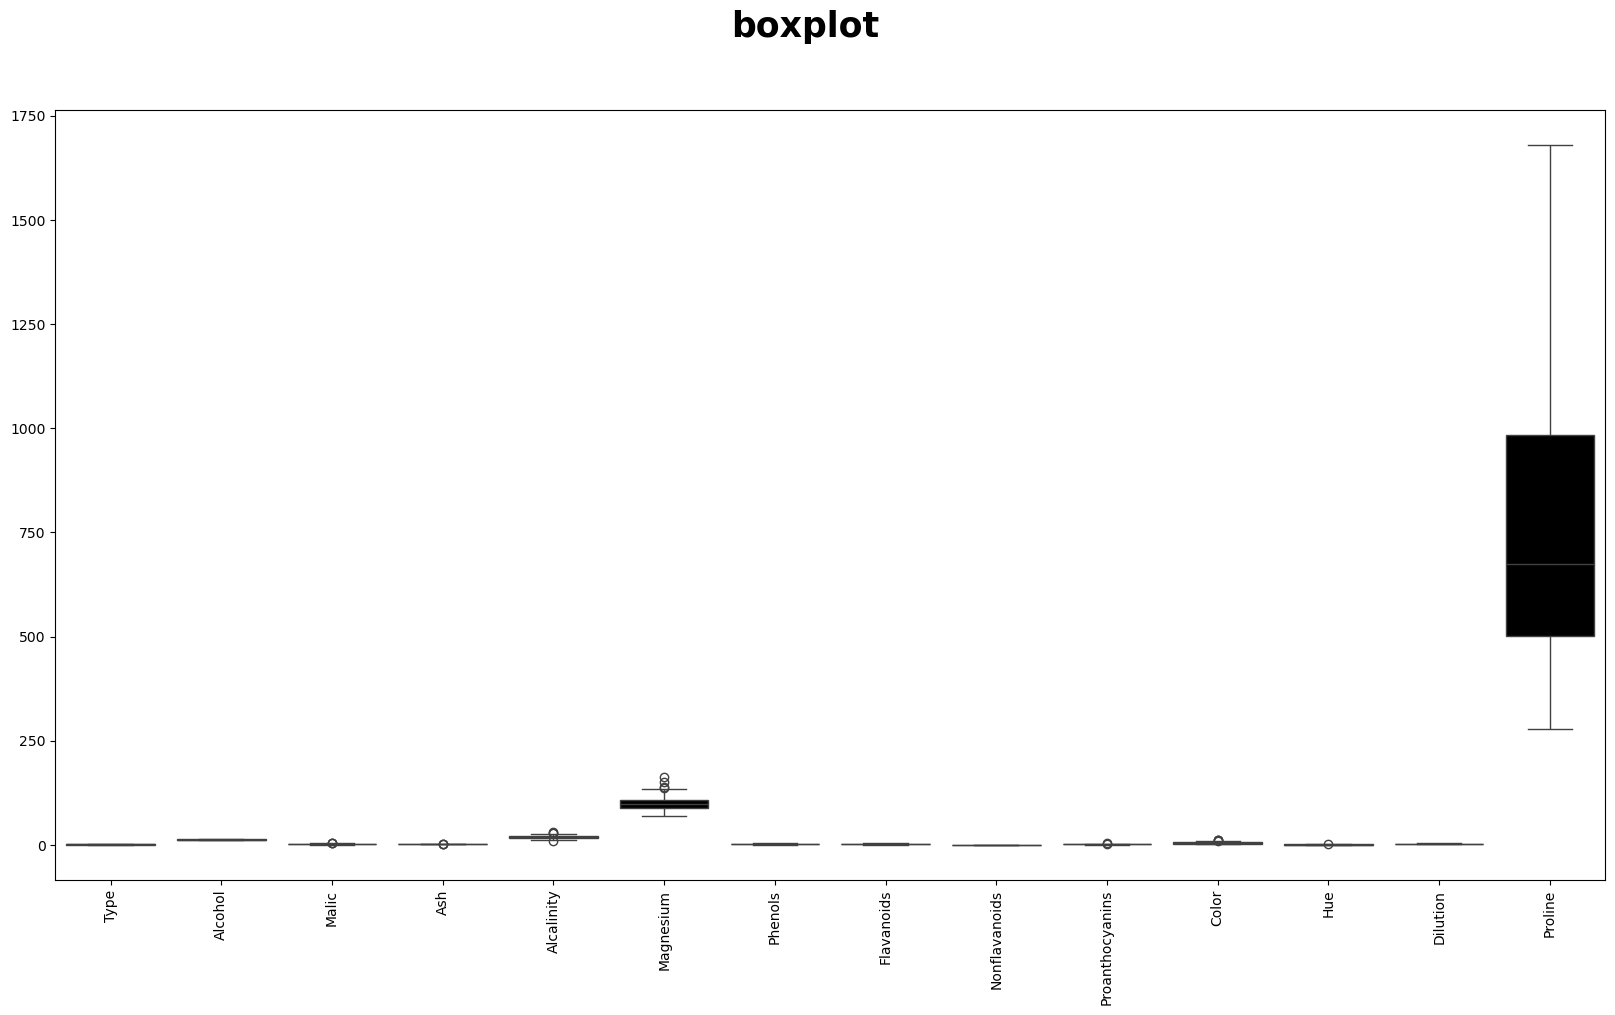

In [58]:
box(df,df.columns)

In [40]:
def hist(df,columns):
    plt.figure(figsize=(20,10))
    df.hist(bins=20)
    plt.suptitle("Histogram")
    plt.show()

<Figure size 2000x1000 with 0 Axes>

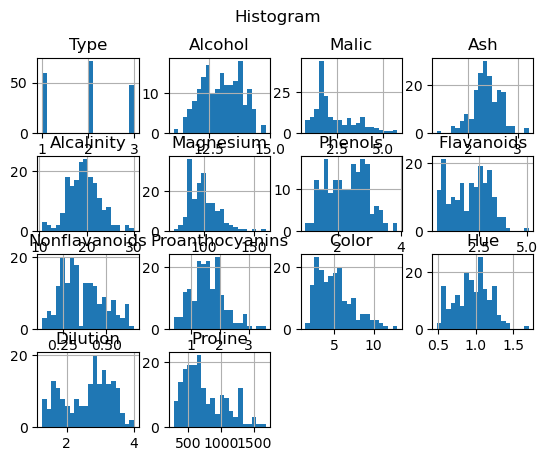

In [42]:
hist(df,df.columns)

In [44]:
def heat(df,columns):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.corr(),annot=True)
    plt.show()

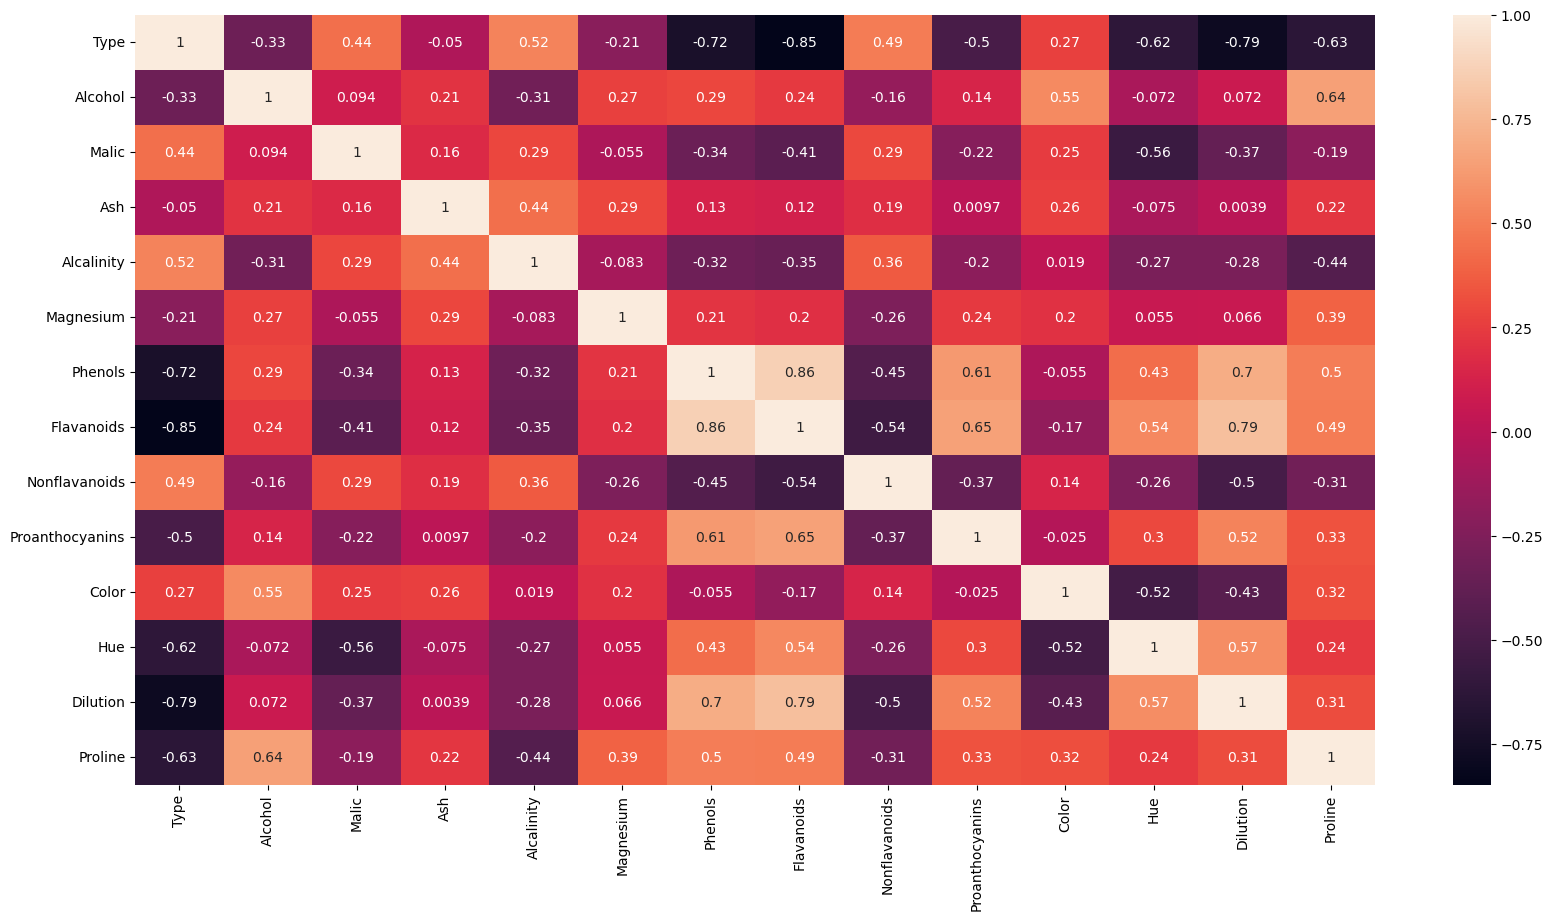

In [46]:
heat(df,df.columns)

In [72]:
def kde(df,columns):
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df,color='blue')
    plt.suptitle("Density Plot")
    plt.show()

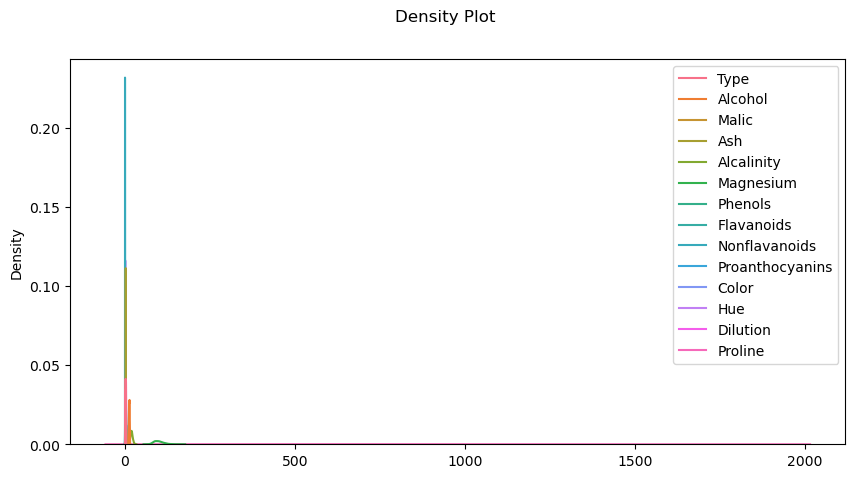

In [74]:
kde(df,df.columns)

### Dimensionality Reduction with PCA:

In [85]:
std=StandardScaler()
df_new=pd.DataFrame(std.fit_transform(df),columns=df.columns)

In [87]:
df_new

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [91]:
pca=PCA()
pca.fit(df_new)

PCA()

In [105]:
pca.explained_variance_ratio_

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

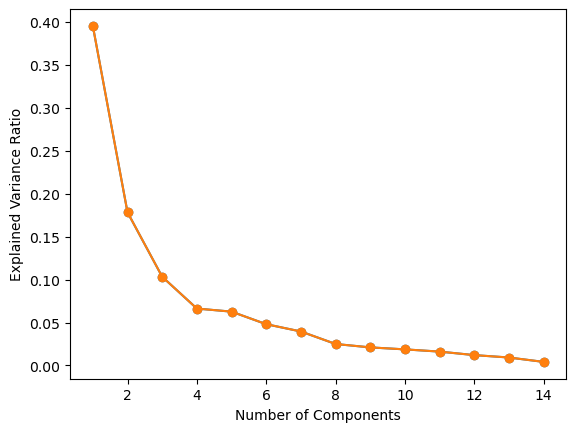

In [107]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

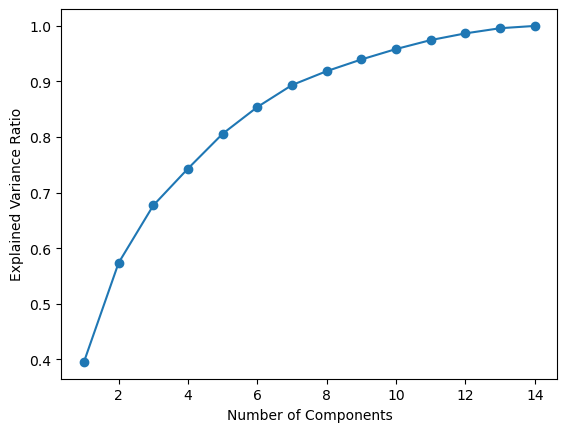

In [111]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [117]:
optimal_pca=PCA(n_components=8)

In [121]:
optimal_pca.fit(df_new)

PCA(n_components=8)

In [133]:
df1=pd.DataFrame(optimal_pca.transform(df_new))
df1

,0,1,2,3,4,5,6,7
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937
...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512


In [135]:
df_new

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


### Clustering with Original Data:

In [336]:
kmeans=KMeans(n_clusters=3)

In [338]:
cluster=kmeans.fit(df_new)

C:\Users\SATEESH REDDY\OneDrive\Desktop\anaconda22\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [339]:
cluster

KMeans(n_clusters=3)

In [340]:
np.unique(cluster.labels_)

array([0, 1, 2])

In [341]:
df_new['cluster']=cluster.labels_

In [342]:
df_new

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2


In [343]:
df_new[df_new['cluster']==0]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
59,0.07996,-0.778980,-1.253450,-3.679162,-2.671018,-0.824415,-0.504914,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540,0
60,0.07996,-0.828391,-1.109824,-0.316249,-1.049479,0.088358,-0.392751,-0.942995,2.160669,-2.069034,-0.773474,1.283518,-1.330077,-0.213021,0
62,0.07996,0.826864,-0.975175,-1.632171,-0.448909,-0.403135,-0.312635,-0.240219,-0.337251,-1.508367,-0.544212,1.195772,-0.214247,-0.372246,0
63,0.07996,-0.778980,-1.082894,-0.754890,-0.148624,-0.894628,1.930629,1.074978,-1.384766,0.489009,-0.263041,1.151898,0.364855,-1.040990,0
64,0.07996,-1.026033,-0.795642,0.597587,-0.148624,0.298998,-0.649124,-0.280377,0.710264,-0.982742,-0.911896,2.160986,-0.539109,-1.247982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.07996,-1.149560,-0.158301,-0.718336,0.451946,-1.035055,0.488531,0.623193,0.065639,-0.422075,-0.994085,-0.427544,0.943956,-1.174738,0
126,0.07996,-0.704864,-0.723829,-0.279695,0.602088,-0.964842,0.712858,1.125176,0.226796,0.313800,-0.483652,-1.173391,0.322481,-1.257535,0
127,0.07996,-1.495434,-0.185231,1.511422,2.704083,-0.543562,-0.264565,0.211566,1.757779,0.296279,-0.890268,0.055064,-0.242496,-0.894503,0
128,0.07996,-0.778980,-0.634063,-0.243142,1.502943,-0.824415,-0.120355,0.422399,0.307374,0.541571,-1.270929,-0.295924,0.237735,-1.289380,0


In [344]:
df_new

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2


In [352]:
-df_new['Type']

0      1.213944
1      1.213944
2      1.213944
3      1.213944
4      1.213944
         ...   
173   -1.373864
174   -1.373864
175   -1.373864
176   -1.373864
177   -1.373864
Name: Type, Length: 178, dtype: float64

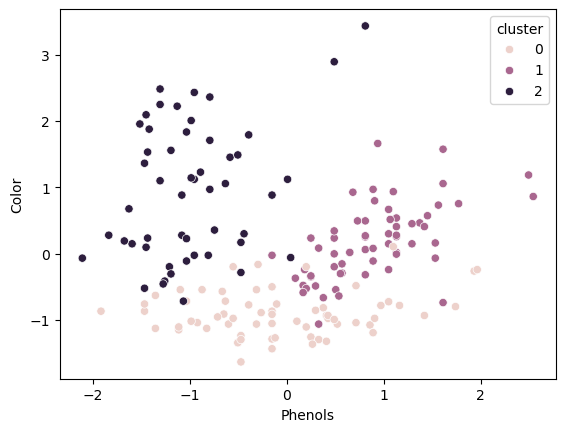

In [354]:
sns.scatterplot(data=df_new,x=df_new['Phenols'], y=df_new['Color'], hue='cluster')
plt.show()

In [356]:
silhouette_score(df_new,cluster.labels_)

0.33275344112066696

### Clustering with PCA Data:

In [288]:
df1

,0,1,2,3,4,5,6,7
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937
...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512


In [290]:
kmeans1=KMeans(n_clusters=3,random_state=53)

In [294]:
cluster1=kmeans1.fit(df1)

C:\Users\SATEESH REDDY\OneDrive\Desktop\anaconda22\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [296]:
cluster1

KMeans(n_clusters=3, random_state=53)

In [298]:
cluster1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [300]:
df1['cluster']=cluster1.labels_

In [302]:
df1

,0,1,2,3,4,5,6,7,cluster
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,1
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,1
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,1
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,1
...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,0
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,0
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0


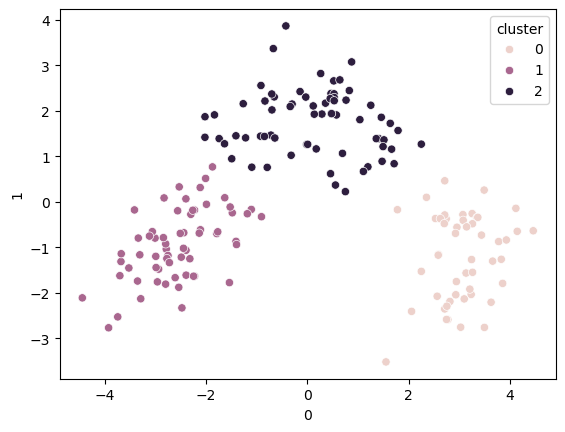

In [363]:
sns.scatterplot(data=df1,x=df1[0],y=df1[1],hue='cluster')
plt.show()

In [359]:
silhouette_score(df1,cluster1.labels_)

0.3686419614858978

## Comparison and Analysis:

In [365]:
print("For Original dataset",silhouette_score(df_new,cluster.labels_))

For Original dataset 0.33275344112066696


In [367]:
print("For PCA Transformed Data",silhouette_score(df1,cluster1.labels_))

For PCA Transformed Data 0.3686419614858978


In [369]:
### Silhouette Score measures how similar each sample is to its own cluster compared to other clusters. A higher Silhouette Score indicates better-defined clusters.

In [371]:
#### The PCA-transformed data has a higher Silhouette Score (0.36) compared to the original data (0.332).
#### This suggests that the clusters are more compact and better separated after applying PCA.

In [373]:
### Scatter plots of the clusters in original and PCA-transformed data can show improved separability with PCA.
### If the clusters are more evenly spread and distinct in the PCA plot, it suggests that dimensionality reduction improved clustering performance.


In [375]:
## 3.	Reflect on the impact of dimensionality reduction on clustering performance.

In [377]:
### Improved Performance: PCA can reduce noise and emphasize the most important patterns, resulting in better clustering performance.
### Loss of Some Information: While PCA reduces dimensionality, it may also remove some variance that could be useful for clustering in certain cases.

In [379]:
## Trade offs

In [381]:
## PCA improves performance when the data has many features with high correlations, but important details may be lost if too few components are chosen.
## Clustering on original data might capture more detail but can suffer from noise and overfitting, especially in high-dimensional spaces.

## Conclusion Insights

In [385]:
##  Key Findings and Insights from the Assignment 
## Dimensionality Reduction with PCA:
## PCA successfully reduced the dimensionality of the dataset while retaining most of the variance.
## The scree plot and cumulative explained variance plot helped determine the optimal number of principal components, balancing simplicity with information retention.
## Clustering Performance:

### Clustering on the PCA-transformed data resulted in better-defined clusters (higher Silhouette Score and lower Davies-Bouldin Index) compared to clustering on the original dataset.
## The PCA-based clustering showed more compact and distinct clusters, suggesting that reducing noise and redundant features can improve clustering outcomes.
## Visual Analysis:

## The scatter plots for PCA data showed better separability between clusters than the original data, indicating that dimensionality reduction helped uncover clearer patterns.


In [387]:
## practical implications of using PCA and clustering in data analysis.

In [389]:
## Clustering with PCA-Transformed Data:

## Applying clustering on PCA-transformed data can lead to more meaningful groupings by focusing on the principal components, which contain the most important patterns.
## PCA is particularly useful in high-dimensional spaces where clustering directly on the original data may suffer from the curse of dimensionality.


In [391]:
### recommendations for when to use each technique based on the analysis conducted.

In [395]:
### When to Use PCA:

## When working with high-dimensional data where features are highly correlated.
## When the primary goal is to reduce computational complexity or remove noise from the dataset.
## When clustering directly on the original data results in poor performance (e.g., overlapping clusters or high Davies-Bouldin Index).
## When to Use Clustering on Original Data:
## When the dataset has a small number of features that are all relevant to the analysis.
## When feature interpretability is important (e.g., knowing how specific original features contribute to clusters).
## When clustering needs to capture complex patterns that might be lost during dimensionality reduction.
## This analysis shows that PCA-base